#Data Visualization

 데이터 품질 및 분포 특성을 시각적으로 확인하기 위해 사용
 
 데이터 이해 및 분석 결과를 설득력 있게 표현하기 위해 사용


모집단 : 분석이 대상이 되는 전체

표본집단 : 모집단에서 추출된 모집단의 부분집합

모집단의 특성을 추정하기 위해서 통계적인 기법을 사용

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']  # dataframe

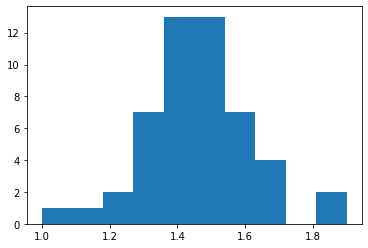

In [ ]:
import matplotlib.pyplot as plt

# histogram
plt.hist(setosa_petal_length)
plt.show()

커널 밀도 추정(KDE)은 커널 함수를 이용한 밀도 추정방법 중 하나이다.

밀도 추정
 - 추출된 데이터들을 이용해서 밀도 함수를 구하는 것이다.
 -  확률 밀도 함수(PDF)를 구하는 것.




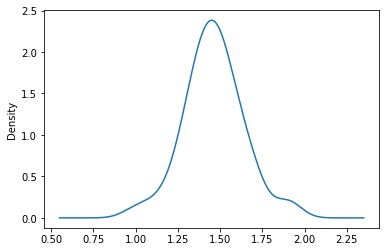

In [ ]:
# 각 데이터 별로 커널함수를 생성해서 커널함수와 연선을 통해 이런식으로 만들어짐.
# 커널함수는 접근하면 1, 좌우 대칭이 되는 함수. 커널함수는 다양함.
# density()를 만들때는 가우시안 연산을 해서 생성.

iris[iris['species']=='setosa']['petal_length'].plot.density()
plt.show()

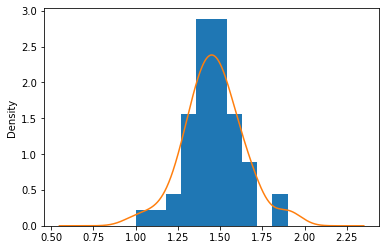

In [ ]:
# 히스토그램 그래프의 정보를 ax에 정의
ax = iris[iris['species'] == 'setosa']['petal_length'].plot.hist(density=True)

# density plot
iris[iris['species'] == 'setosa']['petal_length'].plot.density(ax=ax)
plt.show()

density plot의 최빈값(MODE)
- 제일 꼭대기(뽀족 끝)
- 데이터가 가장 많은 값을 가지고있는. 자주 출현한 데이터
- 최빈값과 평균이 비슷.

#왜도(Skewness)
데이터의 분포에 따라서 오른쪽으로 치우쳤는지 왼쪽으로 치우쳤는지를 확인하는 것.

- Negative skewness : 데이터의 중심(볼록)이 오른쪽으로 치우쳐 졌을 때

- Positive skewness : 데이터의 중심(볼록)이 왼쪽으로 치우쳐 졌을 때

#첨도(Kurtosis)

뾰족한 정도를 말한다.

데이터가 얼마나 평균에 모여있는지를 확인하는 것.

- Leptokurtic(고첨) : 정규분포마다 많이 몰려 있어서 뾰족

- Mesokutic(중첨) : 정규 분포와 유사

- Pltykutic(저첨) : 정규 분포보다 원만

In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

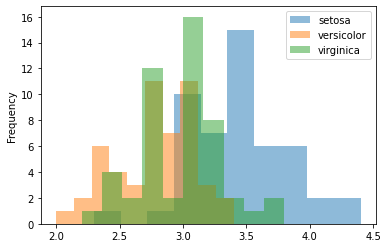

In [ ]:
fig, ax = plt.subplots(1,1)

for species in iris['species'].unique():
  width_series = iris[iris['species'] == species]['sepal_width']
  width_series.plot.hist(alpha = 0.5, ax = ax, label = species)

plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c84ed3950>,
      dtype=object)

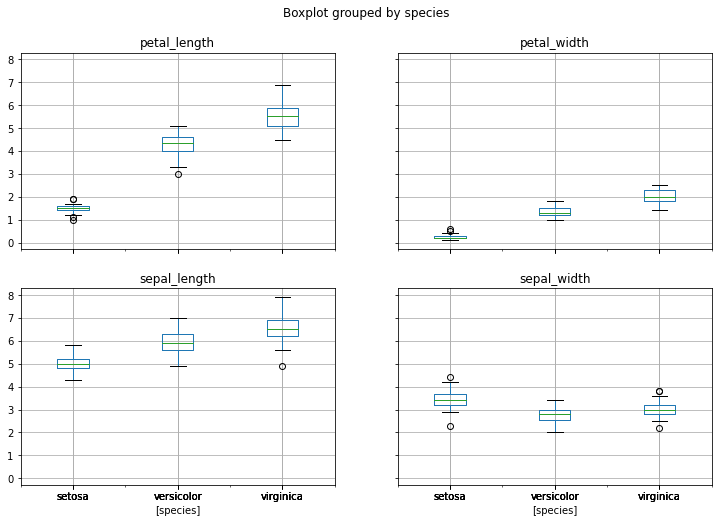

In [ ]:
# Box Plot. 각 컬럼에 대한 분포.
iris.boxplot(by='species', layout=(2,2), figsize=(12,8)) 
            # by: 어떤걸 기준으로 box plot을 그릴건지, plot 4개, 그림판 크기.
 

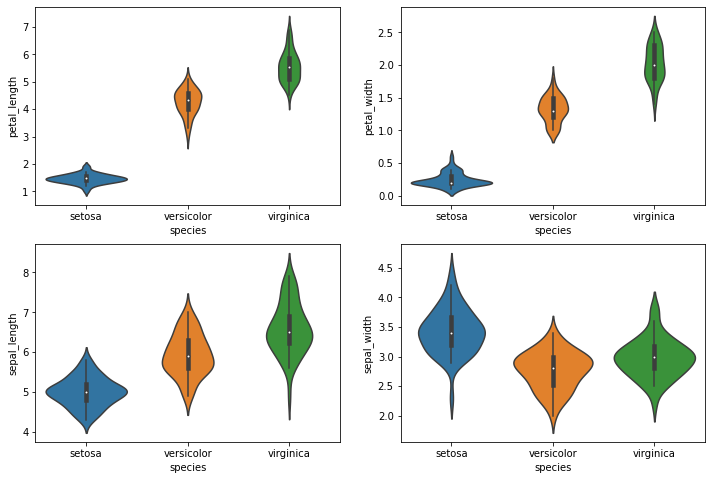

In [ ]:
# Violin plot 
fig, ax = plt.subplots(2, 2, figsize=(12,8))

# 품종별로 보여주기
for i,col in enumerate(['petal_length','petal_width','sepal_length','sepal_width']):
  sns.violinplot(data = iris, x='species', y=col, ax=ax[i//2][i%2])

plt.show()

# 데이터의 중심

중심에 해당하는 통계량이 있다.

최빈값(mode)
 - 빈도가 가장 높은 값
 - 범주형 데이터의 대표값.  (순서형 데이터,범주형 데이터)
 - 2개 이상 존재
 - 극단적인 데이터 값에 영향을 받지 않는 편이다. 


중앙값
 - 데이터를 내림차순 해서 가장 중간에 있는 데이터
 - 짝수개 일 경우는 중앙에 있는 데이터 두개를 더하고 나눈 값이 중앙값이 된다.
 - 중앙값은 크게 변하지 않는다.


산술평균값
 - 일반적으로 사용하는 평균
 - 극단값(이상치 ex.1억)에 영향으르 많이 받는 통계량.
 - 산술평균은 극단값에 영향을 많이 받기 때문에 절삭평균으로 이것을 보정한다.
 - 데이터의 갯수로 나눠준다.



가중평균
 - 일반적인 산술평균을 구할 때 각각의 데이터 마다 중요도에 따라 가중치를 설정하고, 이상치가 있을 경우 해당 가중치를 작은 값으로 적용하여 평균을 구한다.
 -  가중치를 다 더한 값으로 나눠준다.
 


기하평균
 - 성장률이나 증가율 같은 비율에 대한 데이터를 평균 낼 때 사용한다.
 - 음수나 0의 데이터가 있는 경우에는 적용을 못한다.
 - 덧셈으로 하게되면 원금 값이 나옴. 기하평균은 곱셈이기 때문에 음수나 0이 나오면 사용하지 못하는 것이다.

편차
 - 데이터 값과 평균을 빼준 값.
 - 각각 데이터의 평균을 빼준 것이 편차.

분산
 - 편차의 제곱의 합을 데이터 수로 나눈 값.
 - 편차를 모두 더하면 0이 나오기 때문에 제곱을 더하는 것.
 - 편차가 큰 데이터 값에 대해 영향 정도를 키우기 위해서 제곱을 하는 것.

표준편차
 - 분산에 제곱근(루트)을 씌워준 값.


# 단어
모집단
 - 조사 대상이 되는 모든 집단.
 - 이 집단에 해당되는 모든 집단을 구할 수 없다.

표본집단(Sampling)
 - 모집단의 부분집합이다.


모수
 - 모집단의 어떠한 값을 말한다.
 - ex. 평균

통계량
 - 표본집단의 정보(특정 값. 평균 등)를 통해 모수를 예측한다.


In [ ]:
# 평균

import numpy as np

np.arange(10,20, 0.1) # 10에서 20까지 0.1씩 증가값 : 100개

array([10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4,
       15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6,
       17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7,
       18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8,
       19.9])

In [ ]:
# 첫번째 방법
data = np.arange(10,20, 0.1)
data.mean()

14.949999999999982

In [ ]:
# 두번째 방법
sum_ = 0
for i in data:
  sum_ += i
sum_/len(data)

14.949999999999978

In [ ]:
# 절삭평균

# 절삭평균을 알아서 구해준다. 직접 짜는 것 보다 훨씬 좋은 효율.
from scipy.stats import trim_mean

data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10])

mean_ = np.mean(data)    # 있는거 다 더해서 나누기 10
trim_mean_ = trim_mean(data, 0.1)     # 1과 10이 짤린 나머지의 평균
median = np.median(data)    # 10개 중 중앙값은 (5번째+6번째)/2

print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')



mean = 3.7
절삭평균 = 3.25
중앙값 = 3.0



In [ ]:
# 비교해보자

data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 9999999999])

mean_ = np.mean(data)
trim_mean_ = trim_mean(data, 0.1)
median = np.median(data)

print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 909090912.3636364
절삭평균 = 4.0
중앙값 = 3.0



In [ ]:
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 9999999999])
data_length = len(data)

if data_length %2 == 0:
  idx = data_length//2
  median = (data[idx] + data[idx+1]) / 2
else:
  idx = data_length//2
  median = data[idx]

print('중앙값 : ', median)

중앙값 :  3


In [ ]:
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
weights = np.array([0.1, 0.05, 0.3, 0.05, 0.15, 0.025, 0.025, 0.05, 0.125, 0.175]) # 가중치

In [ ]:
print(len(weights), len(data))

10 10


In [ ]:
sum_ = 0

for idx in range(len(data)):
  sum_ += weights[idx] * data[idx] # 분자

print(sum_/sum(weights)) # 가중치 다 더한값 나눠주기

53.80952380952381


In [ ]:
# 최빈값

data = np.array([1, 1, 2, 2, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 8, 9, 10])

# 하나하나 세어보기
count_dict = dict()

for d in data:
  if d not in count_dict:
    count_dict[d] = 1
  else:
    count_dict[d] += 1

print(count_dict)

print(sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[0][0]) # 내림차순으로 정렬하고 5 3 2 1 1 1 1 나오는 것 중에서 [0][0] 자리의 값을 알고싶다

# 람다함수는 이름없는 함수로 함수 대신 사용할 수 있다.
# def func(x):
#   return[1]

{1: 2, 2: 3, 3: 1, 4: 1, 5: 1, 6: 1, 7: 5, 8: 2, 9: 1, 10: 1}
7


In [ ]:
# 편차, 표준편차 분산

# 정규분포로 만들기
norm = np.random.normal(10.0, 2.0, 100) # 표준편차 2.0 100개

In [ ]:
# 평균
norm_mean = norm.mean()

In [ ]:
# 거의 0에 준한다.
sum([i-norm_mean for i in norm])

-1.021405182655144e-13

In [ ]:
# 편차
norm_dev = [i-norm_mean for i in norm]

In [ ]:
# 분산
norm_var = sum([i**2 for i in norm_dev]) / (len(norm)-1)

In [ ]:
# 표준편차
import math

math.sqrt(norm_var)

1.9882302962636318

In [ ]:
# 넘파이 내 표준편차 구하는 메서드
np.std(norm)

1.9782641668570866

In [ ]:
# 기하평균 (다 곱하고 루트)

score_rate = [1.1, 2.1, 0.91, 0.14, 0.51]
mul_ = 1 # 곱셈이니까 초기값 1

for rate in score_rate:
  mul_ *= rate

geometric_mean = mul_ ** (1/len(score_rate)) # 루트니까 분모로 들어가야한다.
geometric_mean

0.6843374651564551

# 실습

In [ ]:
import seaborn as sns
dataset = sns.get_dataset_names()

In [ ]:
dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
planets = sns.load_dataset('planets')

In [ ]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
planets[planets['distance'].isnull()] # NaN 값이 있으면 안됨. 0으로 넣어도 되는건지 아닌지 도메인에 대한 지식이 필요.


,method,number,orbital_period,mass,distance,year
32,Eclipse Timing Variations,1,10220.000000,6.05,NaN,2009
33,Imaging,1,NaN,NaN,NaN,2008
41,Eclipse Timing Variations,1,2900.000000,NaN,NaN,2011
42,Eclipse Timing Variations,1,4343.500000,4.20,NaN,2012
43,Eclipse Timing Variations,2,5840.000000,NaN,NaN,2011
...,...,...,...,...,...,...
989,Transit,1,3.161575,NaN,NaN,2011
997,Transit,1,2.423804,NaN,NaN,2011
998,Transit,1,3.126088,NaN,NaN,2011
999,Transit,1,1.430370,NaN,NaN,2011


In [ ]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# 두개씩 부족함.
penguins[penguins['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
bill_length_mm = penguins[penguins['bill_length_mm'].isnull()==False]
bill_depth_mm = penguins[penguins['bill_depth_mm'].isnull()==False]
flipper_length_mm = penguins[penguins['flipper_length_mm'].isnull()==False]
body_mass_g = penguins[penguins['body_mass_g'].isnull()==False]

notnull_penguins = penguins[penguins['sex'].isnull()==False]

In [ ]:
# 성별 NaN인거 제외하니까 notnull데이터가 없어짐.
notnull_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

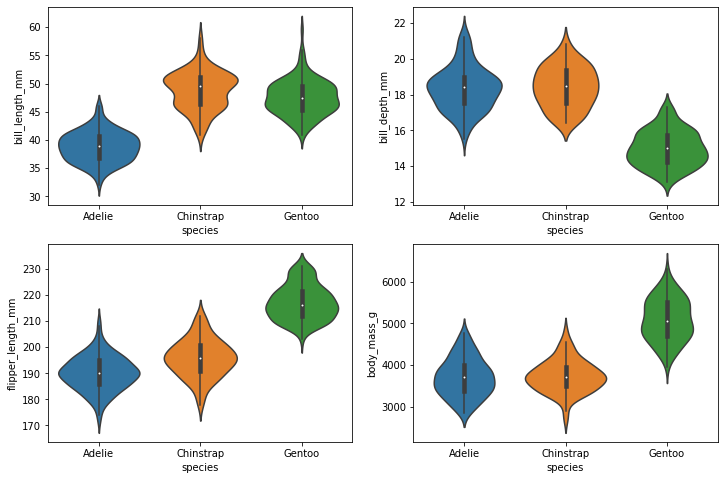

In [ ]:
# Violin plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
  sns.violinplot(data=notnull_penguins, x='species', y=col, ax=ax[i//2][i%2])

plt.show()       

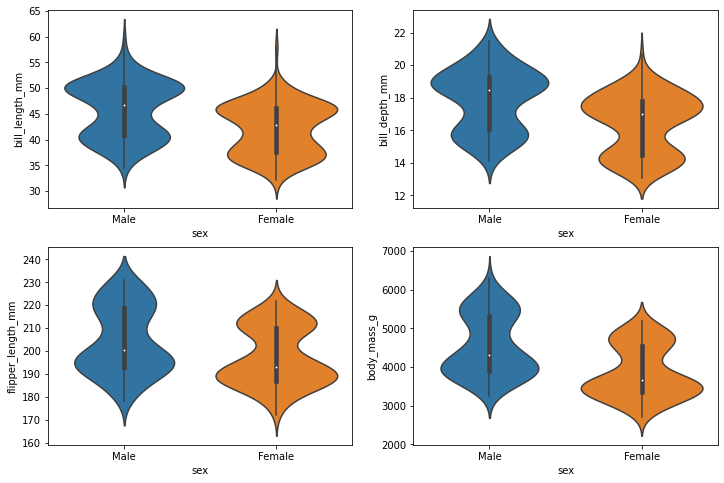

In [ ]:
# Violin plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
  sns.violinplot(data=bill_length_mm, x='sex', y=col, ax=ax[i//2][i%2])

plt.show()     